## Importing required libraries

In [637]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
%matplotlib inline

## Loading the dataset using pandas

In [638]:
df = pd.read_csv('Algerian_forest_fires_dataset.csv', header=1)

In [639]:
# Checking structure of dataset
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


## Data cleaning

In [640]:
# Checking if null datapoints are present in dataset or not
df.isnull().sum(axis=0)

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [641]:
# Checking the null datapoints
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [642]:
# removing the null datapoints
df.dropna(inplace=True)
df.reset_index(inplace=True)

In [643]:
df.iloc[120:125, :]

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
124,125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire


In [644]:
df1 = df.iloc[:122, :]
df1

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,117,26,09,2012,31,54,11,0,82,6,16.3,2.5,6.2,1.7,not fire
118,118,27,09,2012,31,66,11,0,85.7,8.3,24.9,4,9,4.1,fire
119,119,28,09,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire
120,120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire


In [645]:
df2 = df.iloc[123:, :]
df2

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
124,125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
125,126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
126,127,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire
127,128,05,06,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
240,242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [646]:
df_combined = pd.concat([df1, df2], ignore_index=True, sort = False)

In [647]:
df_combined.drop(columns=['index'], inplace=True)

In [648]:
df_combined

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
239,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
240,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
241,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [649]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4    RH          243 non-null    object
 5    Ws          243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
dtypes: object(14)
memory usage: 26.7+ KB


In [650]:
# As the column names are containing white spaces beofre and after so trimming the white spaces
df_combined.columns = df_combined.columns.str.strip()

In [651]:
# Changing the datatypes of the veriables as required
df_combined['Temperature'] = df_combined['Temperature'].astype('int32')
df_combined['RH'] = df_combined['RH'].astype('int32')
df_combined['Ws'] = df_combined['Ws'].astype('int32')
df_combined['Rain'] = df_combined['Rain'].astype('float')
df_combined['FFMC'] = df_combined['FFMC'].astype('float')
df_combined['DMC'] = df_combined['DMC'].astype('float')
df_combined['DC'] = df_combined['DC'].astype('float')
df_combined['ISI'] = df_combined['ISI'].astype('float')
df_combined['BUI'] = df_combined['BUI'].astype('float')

In [652]:
df_combined.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [653]:
df_combined.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire
4,05,06,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [654]:
# We are getting spaces for the Classes columns, we need to remove the spaces
df_combined['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [655]:
# Counting frequency of Classes binary categorical variables. Expected 2 but due to white spaces more than 2
df_combined.groupby('Classes').count()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Classes,,,,,,,,,,,,,
fire,4,4,4,4,4,4,4,4,4,4,4,4,4
fire,2,2,2,2,2,2,2,2,2,2,2,2,2
fire,131,131,131,131,131,131,131,131,131,131,131,131,131
not fire,2,2,2,2,2,2,2,2,2,2,2,2,2
not fire,1,1,1,1,1,1,1,1,1,1,1,1,1
not fire,101,101,101,101,101,101,101,101,101,101,101,101,101
not fire,1,1,1,1,1,1,1,1,1,1,1,1,1
not fire,1,1,1,1,1,1,1,1,1,1,1,1,1


In [656]:
# Generating proper format of binary categorical variable for Classes
row_count = df_combined.shape[0]
for i in range(row_count):
    if 'not fire' in df_combined.loc[i, 'Classes']:
        df_combined.loc[i, 'Classes'] = 'not fire'
    else:
        df_combined.loc[i, 'Classes'] = 'fire'

In [657]:
df_combined['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [658]:
df.head()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [659]:
df_combined.groupby('Classes').count()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Classes,,,,,,,,,,,,,
fire,137,137,137,137,137,137,137,137,137,137,137,137,137
not fire,106,106,106,106,106,106,106,106,106,106,106,106,106


In [660]:
df_combined

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire
4,05,06,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,09,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
239,27,09,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,not fire
240,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
241,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [661]:
df_combined.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire
4,05,06,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [662]:
# For analyzing converting Classes to numerical variables
row_count = df_combined.shape[0]
for i in range(row_count):
    if 'not fire' in df_combined.loc[i, 'Classes']:
        df_combined.loc[i, 'isFire'] = 0
    else:
        df_combined.loc[i, 'isFire'] = 1

In [663]:
df_combined['isFire'].unique()

array([0., 1.])

In [664]:
df_combined['isFire'] = df_combined['isFire'].astype('int32')

In [665]:
df_combined['isFire'].unique()

array([0, 1], dtype=int32)

In [666]:
# Saving the cleaned dataset into fresh csv file
df_combined.to_csv('Algerian_forest_fires_cleaned_dataset.csv', index=False)

## Feature Engineering

In [667]:
# Loading the cleaned dataset for Feature Engineering, EDA and Model Training and testing
df_cleaned = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [668]:
df_cleaned

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,isFire
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,0
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,0
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,0


In [669]:
# Removing unnecessery features which we don't need for analysis
df_analysis = df_cleaned.drop(['day','month','year','isFire','Classes'], axis=1)

In [670]:
df_analysis.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


## EDA

<ipython-input-671-7bf6ee6db253>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


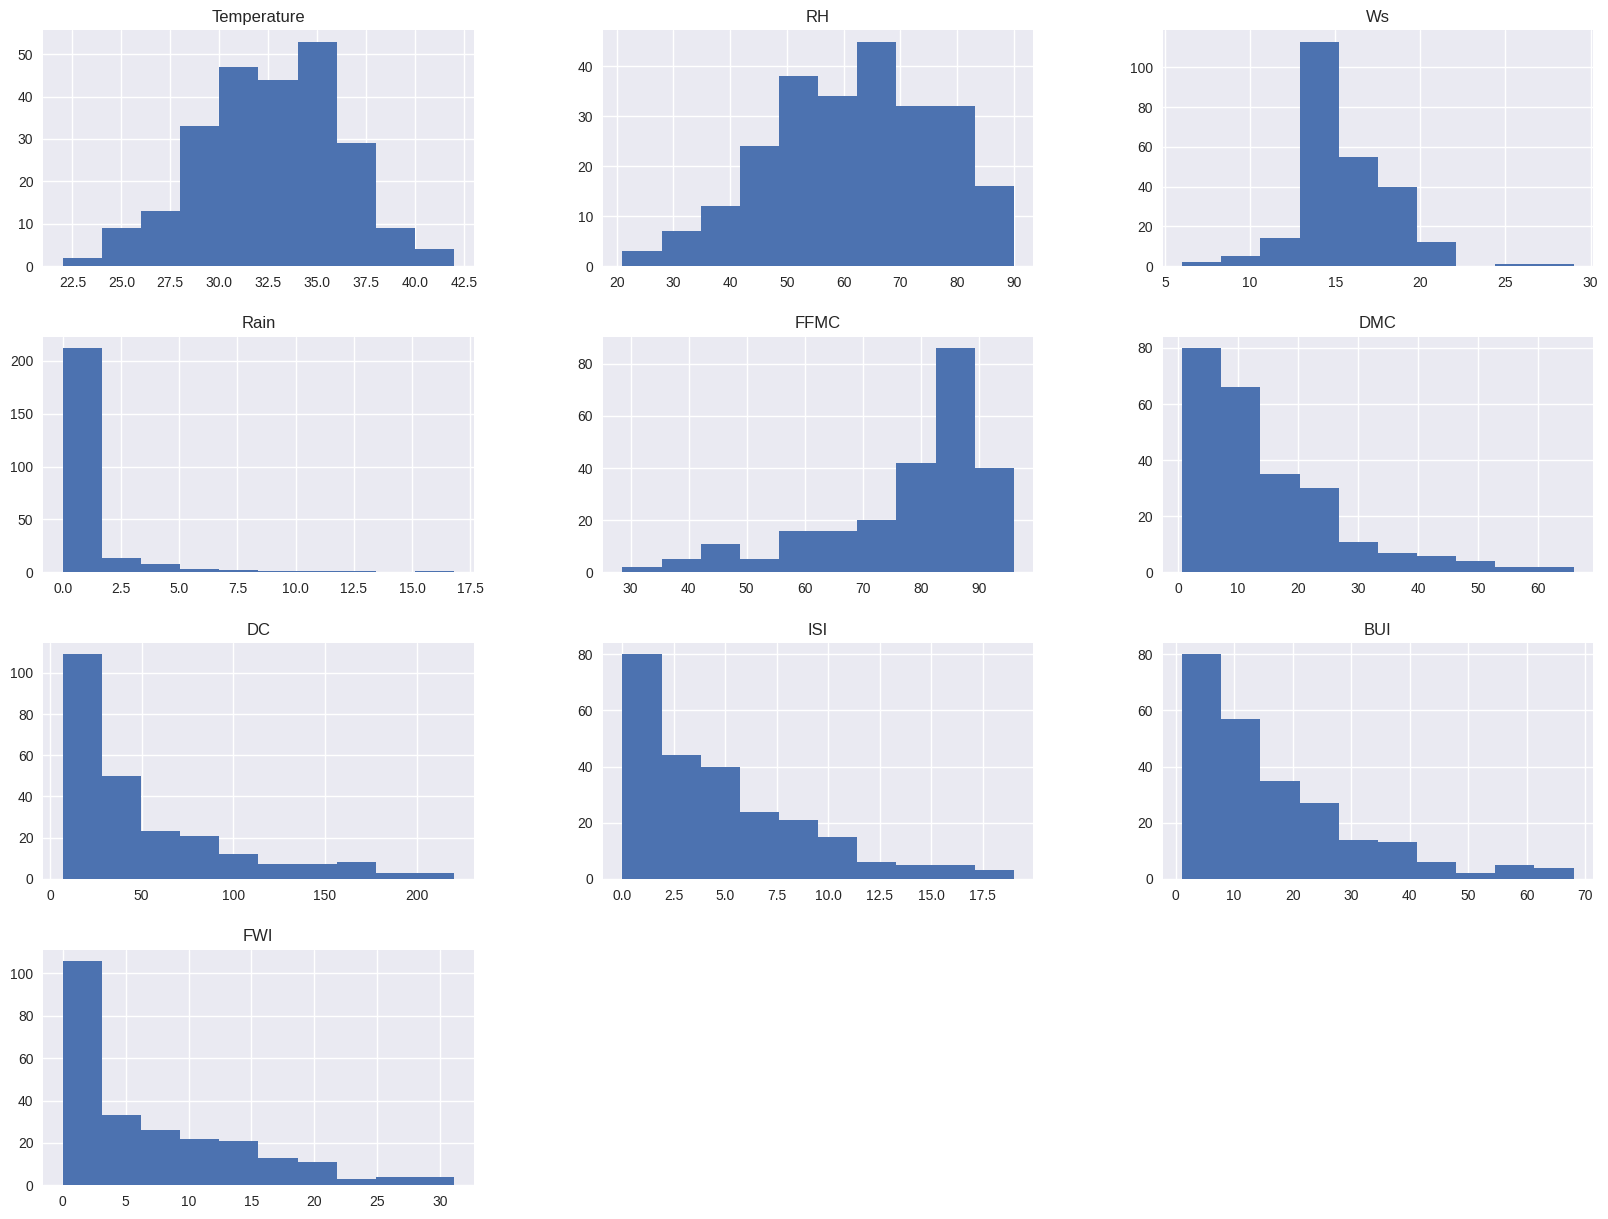

In [671]:
# As we can see most of the features follow normal distribution (Some features following left skewed and right skewed normal distribution due to having outliers)
plt.style.use('seaborn')
df_analysis.hist(bins=10, figsize=(20,15))
plt.show()

<Axes: >

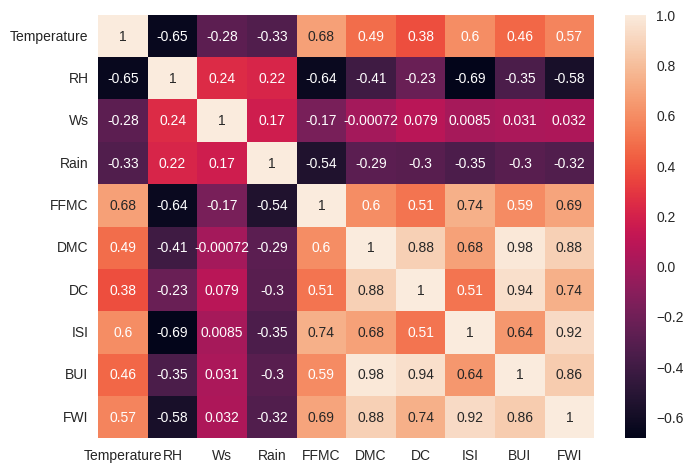

In [672]:
# Analyzing correlation coefficients for better analysis of the features which are important to consider.
sns.heatmap(df_analysis.corr(), annot=True)

In [673]:
# Extracting Independent and Dependent features
X_data = df_analysis.drop(['FWI'], axis=1)
Y_data = df_analysis['FWI']

In [674]:
# Training and testing dataset splitting
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.3, random_state=100)

<Axes: >

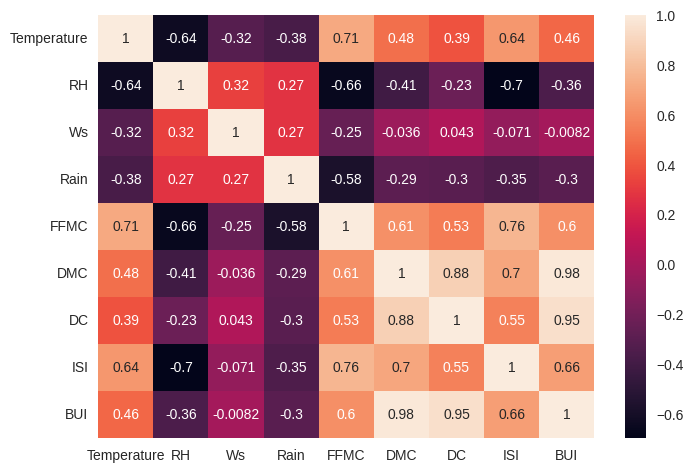

In [675]:
sns.heatmap(X_train.corr(), annot=True)

In [676]:
# Removing highly correlated independent features for reducing model complexity and reducing overfitting
def highlyCorrelatedFeatureExtraction(data, threshold):
    feature_to_remove = set()
    corr_metric = data.corr()
    indep_columns = corr_metric.columns
    for i in range(len(indep_columns)):
        for j in range(i):
            if abs(corr_metric.iloc[i, j]) >= threshold:
                print(corr_metric.columns[i], 'is highly correlated with', corr_metric.columns[j])
                feature_to_remove.add(corr_metric.columns[i])
    return feature_to_remove

In [677]:
feature_remove = highlyCorrelatedFeatureExtraction(X_train, 0.85)

DC is highly correlated with DMC
BUI is highly correlated with DMC
BUI is highly correlated with DC


In [678]:
X_train.drop(feature_remove, axis=1, inplace=True)

In [679]:
X_test.drop(feature_remove, axis=1, inplace=True)

In [680]:
X_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI
151,34,42,15,1.7,79.7,12.0,2.2
189,37,56,11,0.0,87.4,11.2,5.2
145,35,68,16,0.0,85.3,10.0,4.9
74,33,66,14,0.0,87.0,21.7,5.7
233,35,34,17,0.0,92.2,23.6,13.8


In [681]:
X_test.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI
65,34,65,13,0.0,86.8,11.1,5.2
59,31,79,15,0.0,85.4,28.5,4.7
191,39,39,15,0.2,89.3,15.8,8.2
111,28,84,18,0.0,83.8,13.5,4.5
112,31,55,11,0.0,87.8,16.5,5.4


In [682]:
# Scalling into Z-scaled value for same scale
scaling = StandardScaler()
X_train_scaled = scaling.fit_transform(X_train)
X_test_scaled = scaling.transform(X_test)

In [683]:
X_test_scaled

array([[ 0.52140168,  0.19772417, -0.85056892, -0.38648145,  0.64770016,
        -0.29523825,  0.12771877],
       [-0.27475058,  1.13701264, -0.17330093, -0.38648145,  0.55199479,
         1.0640065 ,  0.00776191],
       [ 1.84832211, -1.54666871, -0.17330093, -0.29616963,  0.81860261,
         0.07191407,  0.84745994],
       [-1.07090284,  1.47247281,  0.84260106, -0.38648145,  0.44261723,
        -0.10775622, -0.04022083],
       [-0.27475058, -0.47319617, -1.52783691, -0.38648145,  0.71606114,
         0.12659633,  0.17570152],
       [ 0.52140168, -0.7415643 ,  0.16533307,  1.32944306,  0.01194306,
        -0.53740255, -0.64000513],
       [ 1.31755394, -1.74794481, -0.85056892, -0.115546  ,  0.60668357,
         0.23596085,  0.03175329],
       [ 1.05216985, -1.27830057, -0.17330093,  0.47148081,  0.34007576,
        -0.42803803, -0.35210867],
       [-0.54013467,  0.73446044,  0.50396707,  0.01992172, -1.04765209,
        -0.95923713, -0.85592748],
       [ 1.05216985, -0.6073

<Axes: >

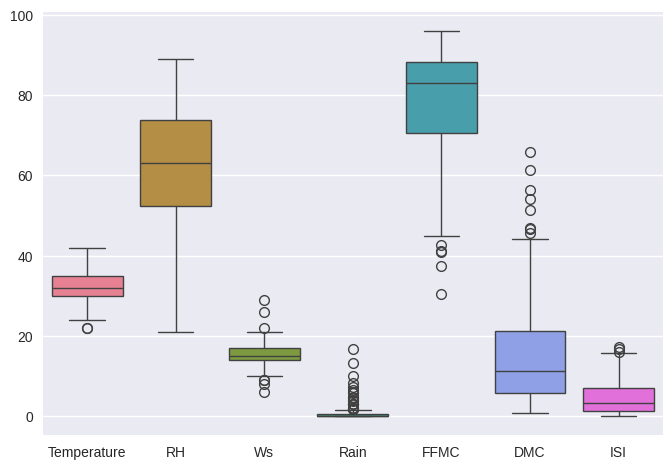

In [684]:
# Analyzing outliers using box plot
sns.boxplot(X_train)

<Axes: >

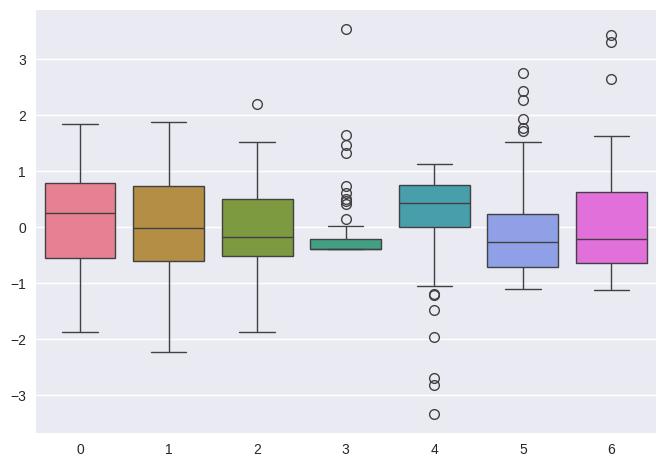

In [685]:
# Analyzing outliers using box plot for scaled data
sns.boxplot(X_test_scaled)

## Model training

In [686]:
# Applying simple linear regressiong model
simple_linear_model = LinearRegression(n_jobs=-1, fit_intercept=True, positive=False)
simple_linear_model.fit(X_train_scaled, Y_train)
simple_linear_Y_pred = simple_linear_model.predict(X_test_scaled)

Text(0, 0.5, 'Y_pred')

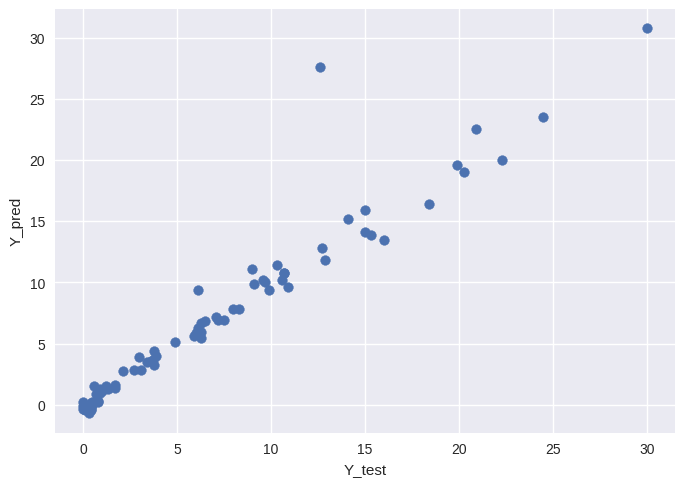

In [687]:
plt.scatter(Y_test, simple_linear_Y_pred)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')

In [688]:
r2_score_val = r2_score(Y_test, simple_linear_Y_pred)
mse = mean_squared_error(Y_test, simple_linear_Y_pred)
mae = mean_absolute_error(Y_test, simple_linear_Y_pred)
print('R2 Score: ', r2_score_val)
print('Mean Squared Error: ', mse)
print('Mean Absolute Error ', mae)

R2 Score:  0.916904808942842
Mean Squared Error:  3.8578806593545667
Mean Absolute Error  0.8198330369899022


In [689]:
print("Feature Coefficients: ", simple_linear_model.coef_)
print("Feature intercept: ", simple_linear_model.intercept_)

Feature Coefficients:  [-0.13205294  0.26053789  0.01425587 -0.05679021 -0.74504062  3.49973456
  5.56197047]
Feature intercept:  7.048823529411766


In [690]:
possible_alpha_values = np.linspace(0.5, 10, 1000)

In [691]:
# Applying lasso regressiong model for hyperparameter tuning with cross validation
lassoCV_model = LassoCV(alphas=possible_alpha_values, cv=5, max_iter=100000, n_jobs=-1, fit_intercept=True)
lassoCV_model.fit(X_train_scaled, Y_train)
lassoCV_Y_pred = lassoCV_model.predict(X_test_scaled)

Text(0, 0.5, 'Y_pred')

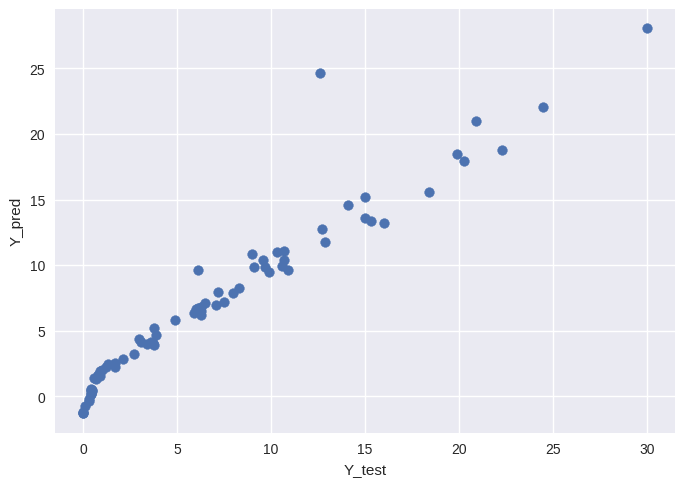

In [692]:
plt.scatter(Y_test, lassoCV_Y_pred)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')

In [693]:
r2_score_val = r2_score(Y_test, lassoCV_Y_pred)
mse = mean_squared_error(Y_test, lassoCV_Y_pred)
mae = mean_absolute_error(Y_test, lassoCV_Y_pred)
print('R2 Score: ', r2_score_val)
print('Mean Squared Error: ', mse)
print('Mean Absolute Error ', mae)

R2 Score:  0.9278702652587075
Mean Squared Error:  3.348784750147545
Mean Absolute Error  1.0200881446816477


In [694]:
print("Best alpha value for Lasso regression: ", lassoCV_model.alpha_)
print("Feature Coefficients: ", lassoCV_model.coef_)
print("Feature intercept: ", lassoCV_model.intercept_)

Best alpha value for Lasso regression:  0.5
Feature Coefficients:  [ 0.         -0.          0.          0.          0.          3.12168101
  4.51121238]
Feature intercept:  7.048823529411766


In [695]:
print("Cross validation MSE regularization path: ", lassoCV_model.mse_path_)
print(lassoCV_model.mse_path_.shape)

Cross validation MSE regularization path:  [[56.48758705 80.41731834 72.04414846 52.81530277 39.21672362]
 [56.48758705 80.41731834 72.04414846 52.81530277 39.21672362]
 [56.48758705 80.41731834 72.04414846 52.81530277 39.21672362]
 ...
 [ 1.48252441  3.08038998  1.55386082  1.27319081  0.97055871]
 [ 1.47000862  3.05540419  1.53099536  1.26955402  0.96993273]
 [ 1.45768254  3.0307366   1.50848966  1.2661214   0.96944954]]
(1000, 5)


In [696]:
# Applying rigde regressiong model for hyperparameter tuning with cross validation
ridgeCV_model = RidgeCV(alphas=possible_alpha_values, cv=5, fit_intercept=True)
ridgeCV_model.fit(X_train_scaled, Y_train)
ridgeCV_Y_pred = ridgeCV_model.predict(X_test_scaled)

Text(0, 0.5, 'Y_pred')

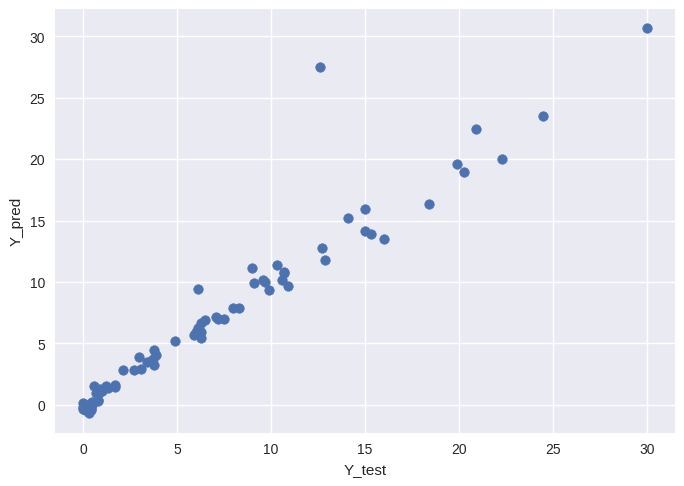

In [697]:
plt.scatter(Y_test, ridgeCV_Y_pred)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')

In [698]:
r2_score_val = r2_score(Y_test, ridgeCV_Y_pred)
mse = mean_squared_error(Y_test, ridgeCV_Y_pred)
mae = mean_absolute_error(Y_test, ridgeCV_Y_pred)
print('R2 Score: ', r2_score_val)
print('Mean Squared Error: ', mse)
print('Mean Absolute Error ', mae)

R2 Score:  0.9180899755144447
Mean Squared Error:  3.802856642482707
Mean Absolute Error  0.8131617874994004


In [699]:
print("Best alpha value for Lasso regression: ", ridgeCV_model.alpha_)
print("Feature Coefficients: ", ridgeCV_model.coef_)
print("Feature intercept: ", ridgeCV_model.intercept_)

Best alpha value for Lasso regression:  0.5
Feature Coefficients:  [-0.12728628  0.24133345  0.02540648 -0.05290818 -0.71098582  3.49887907
  5.50614707]
Feature intercept:  7.048823529411766


In [700]:
# Applying elastic net regressiong model for hyperparameter tuning with cross validation with lasso cv of priority of 60%
elasticNetCV_model = ElasticNetCV(alphas=possible_alpha_values, cv=5, fit_intercept=True, l1_ratio=0.6, n_jobs=-1)
elasticNetCV_model.fit(X_train_scaled, Y_train)
elasticNetCV_Y_pred = ridgeCV_model.predict(X_test_scaled)

Text(0, 0.5, 'Y_pred')

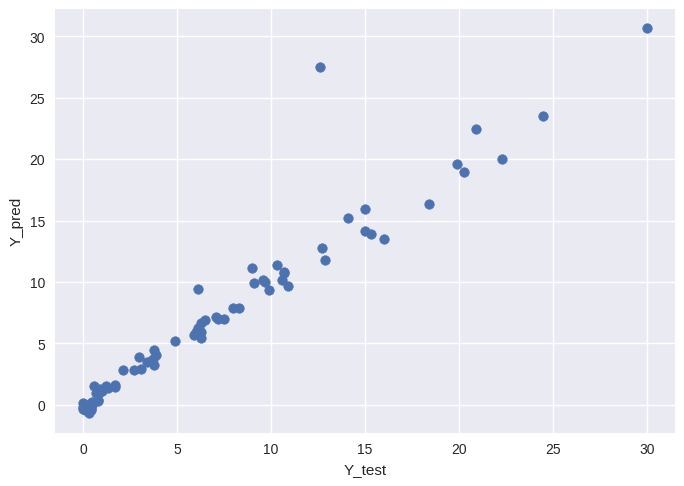

In [701]:
plt.scatter(Y_test, elasticNetCV_Y_pred)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')

In [702]:
r2_score_val = r2_score(Y_test, elasticNetCV_Y_pred)
mse = mean_squared_error(Y_test, elasticNetCV_Y_pred)
mae = mean_absolute_error(Y_test, elasticNetCV_Y_pred)
print('R2 Score: ', r2_score_val)
print('Mean Squared Error: ', mse)
print('Mean Absolute Error ', mae)

R2 Score:  0.9180899755144447
Mean Squared Error:  3.802856642482707
Mean Absolute Error  0.8131617874994004


In [703]:
print("Best alpha value for Lasso regression: ", elasticNetCV_model.alpha_)
print("Feature Coefficients: ", elasticNetCV_model.coef_)
print("Feature intercept: ", elasticNetCV_model.intercept_)

Best alpha value for Lasso regression:  0.5
Feature Coefficients:  [ 3.43090922e-03 -1.48448856e-01  0.00000000e+00 -0.00000000e+00
  2.43629617e-01  3.04805260e+00  3.72589630e+00]
Feature intercept:  7.048823529411766


In [704]:
print("Cross validation MSE regularization path: ", elasticNetCV_model.mse_path_)
print(elasticNetCV_model.mse_path_.shape)

Cross validation MSE regularization path:  [[51.49489815 77.67629065 68.70784562 47.86426072 34.21834236]
 [51.46684703 77.63716709 68.68892615 47.83718125 34.19719269]
 [51.43876493 77.59799967 68.66998099 47.81007232 34.17601842]
 ...
 [ 2.85840131  5.09317122  3.27983882  2.33222034  1.57954756]
 [ 2.81145457  5.01096816  3.20647696  2.2918929   1.5576167 ]
 [ 2.76466377  4.92903435  3.13357257  2.25171911  1.53589844]]
(1000, 5)
